In [1]:
#필요한 라이브러리 불러오기 
import tensorflow as tf 
import numpy as np

In [2]:
mnist = tf.keras.datasets.fashion_mnist #fasion mnist 데이터 불러오기

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data() #mnist 데이터 불러오기 - train, test data 지정
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0 #image pixel /255로 normalization 

In [4]:
print(x_train_full.shape, y_train_full.shape) # x data, y 데이터 shape 확인

(60000, 28, 28) (60000,)


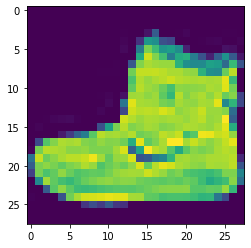

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(x_train_full[0,]) # mnist 데이터 이미지 확인 

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               " Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]  #총 10개의 class로 이루어져 있음

In [8]:
class_names[y_train_full[0]] #각 이미지에 class 지정되어 있음

'Ankle boot'

In [9]:
y_train_full_onehot = np.zeros((y_train_full.size, y_train_full.max()+ 1)) 
#y_train 값을 one-hot vector 형태로 만들어 주기 위함.
#먼저 np.zeros 함수를 사용하여 0으로 가득찬 vector를 만들어 주고
y_train_full_onehot[np.arange(y_train_full.size),y_train_full] = 1
#해당 클래스 부분에 1을 채워주어 y_train vector를 만들어 준다

In [10]:
y_train_full_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_train, x_valid = x_train_full[0:50000, :, :], x_train_full[50000:, :, :] #xtrainset을 trainset과 validation set으로 나눠준다

In [12]:
y_train, y_valid = y_train_full_onehot[0:50000, :], y_train_full_onehot[50000:, :] #y trainset도 동일하게 train set과 validation set으로 나눠준다

In [13]:
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape) #각각의 train set, validation set의 shape를 보면 다음과 같다

(50000, 28, 28) (10000, 28, 28) (50000, 10) (10000, 10)


### Using "tf.keras.models.Sequential", construct "Neural Network" with
[0] layer is input layer
[1] layer has 300 nodes
[2] layer has 200 nodes
[3] layer is output layer

In [14]:
x_train.shape #input shape 28,28 - 모델들어갈 때 input size설정

(50000, 28, 28)

In [15]:
y_train_full_onehot.shape # class 10개 최종 모델 마지막부분 10개의 노드로 출력

(60000, 10)

In [16]:
import tensorflow as tf
num_classes = 10 #주어진 데이터의 클래스는 총 10개로 구성되어 있다.

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])
#tensorflow 안에 있는 keras라는 라이브러리 안에 있는 models라는 모듈 안에 있는 sequential 함수를 사용한다
#이를 사용하여 간단한 신경망 모델을 만드느넫, 순서대로 연결된 층을 일렬로 쌓아서 구성한다

#flatten: 2차원 배열 (28x28 pixel)의 이미지를 1차원 배열로 변환 - 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림(이 층에서는 학습되는 가중치가 없고 데이터 반환만 이루어짐)
#Dense : fully-connected 층,
#첫번째 Dense 층 300개의 노드 가짐
#두번째 층 200개의 노드 가짐
#세번 째 층 (마지막 층) - 10개의 노드의 softmax 층 가짐 -10개의 확률을 반환하고 반환된 값의 전체 합은 1
#-> 각 노드는 주어진 이미지가 10개의 클래스 중 하나에 속할 확률들을 출력함

###  Count how may parameters are needed with the model in 1. Check your calculation with "model.summary()" in python. 

In [17]:
# 각 노드에서 필요한 parameter를 계산하는 식을 이용하면 다음과 같다.
# parameter number = output channel 수 * (input channel 수 + 1)
print(300*(784+1)) #235500 개
print(200*(300+1)) # 60200개
print(10*(200+1)) # 2010개
#이 모델은 총 297710개의 학습 parameter가 요구된다

235500
60200
2010


In [18]:
model.summary() 
#summmary함수를 통해 parameter 수를 확인해본 결과,
#이 모델은 총 297710개의 학습 parameter가 요구된다
#위에서 직접 계산한 parameter수와 동일하다

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


###  Train your model, and draw learning curve to see whether the learning is proper or not. 

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#모델을 훈련하기 전 필요한 몇가지 설정들이 compile단계를 통해 추가된다
#loss : 손실함수 loss function- 훈련 하는 동안 모델의 오차 측정 위한 함수 결정 (모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화 함)
#optimizer : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정 - sgd(stochastic gradient descent)선택
#metrics: training과 test단계에서 지표 선택 - 올바르게 분류된 이미지의 비율인 accuracy 선택

In [20]:
history =  model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), batch_size=128)
#신경망 모델 훈련- train data 학습, epoch(신경망에서 전체 데이터 셋에 대해 한 번 학습을 완료한 상태)은 20으로 설정 
#batch size(한번의 batch 마다 주는 데이터 sample의 size) 는 128로 설정 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 99us/sample - loss: 1.1165 - accuracy: 0.6672 - val_loss: 0.7318 - val_accuracy: 0.7611
Epoch 2/20
50000/50000 [==============================] - 4s 77us/sample - loss: 0.6587 - accuracy: 0.7858 - val_loss: 0.6046 - val_accuracy: 0.7992
Epoch 3/20
50000/50000 [==============================] - 4s 74us/sample - loss: 0.5705 - accuracy: 0.8113 - val_loss: 0.5611 - val_accuracy: 0.8059
Epoch 4/20
50000/50000 [==============================] - 4s 78us/sample - loss: 0.5251 - accuracy: 0.8239 - val_loss: 0.5245 - val_accuracy: 0.8197
Epoch 5/20
50000/50000 [==============================] - 4s 77us/sample - loss: 0.4956 - accuracy: 0.8314 - val_loss: 0.4954 - val_accuracy: 0.8245
Epoch 6/20
50000/50000 [==============================] - 4s 74us/sample - loss: 0.4759 - accuracy: 0.8372 - val_loss: 0.4772 - val_accuracy: 0.8337
Epoch 7/20
50000/50000 [==============================] 

In [21]:
result = history.history

In [22]:
result.keys() #학습하는 동안의 loss, accuracy, val_loss, val_accuracy 저장

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

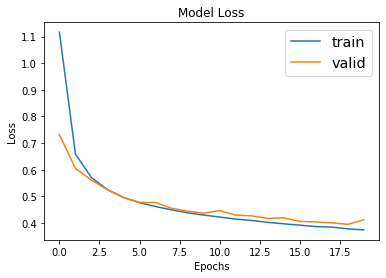

In [23]:
plt.plot(result['loss'], label="train")
plt.plot(result['val_loss'], label = "valid")
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize='x-large')
plt.show() #잘 학습되었는지 loss를 figure를 통해 확인

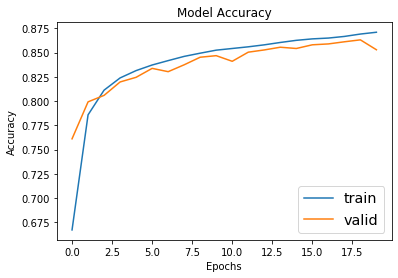

In [24]:
plt.plot(result["accuracy"], label="train")
plt.plot(result["val_accuracy"], label="valid")
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize='x-large')
plt.show() #잘 학습되었는지 accuracy를 figure를 통해 확인

###  Using the model in 3, predict the test set. What is the accuracy of your model in the test data ?

In [25]:
#직접 predict하여 비교하여 accuracy를 구하였다

In [26]:
y_pred = model.predict(x_test) #앞서 훈련한 모델을 사용하여 test set에 있는 각 이미지의 label 예측
y_pred[0,:] # 예측결과 , 10개의 숫자 배열로 나타남 

array([2.6982130e-05, 4.4829644e-06, 2.1221482e-05, 8.4265075e-06,
       4.4014455e-06, 8.5227758e-02, 5.1864543e-05, 1.5809521e-01,
       6.7649470e-03, 7.4979478e-01], dtype=float32)

In [27]:
print(y_pred.shape)

(10000, 10)


In [28]:
y_pred_class = np.argmax(y_pred, axis=1) #다차원 배열에서 차원에 따라 가장 큰 값의 index들을 반환해주는 np.argmax함수를 이용하여 최종적으로 label를 예측한다

In [29]:
y_pred_class[:5] # 예측된 class들을 살펴보면 다음과 같이  하나의 클래스로 결정된다. 

array([9, 2, 1, 1, 6], dtype=int64)

In [30]:
np.mean(y_test == y_pred_class) #올바르게 분류된 이미지의 비율인 accuracy를 계산해보면 0.8498이 나온다. 

0.8498

###  Draw the first 5 figures of wrong predictions. What are predicted classifications by your model and the actual classifications for these figures?

In [31]:
predict_result = (y_test == y_pred_class) #잘못 예측된 이미지를 찾기 위해 먼저 true, false 형태로 잘 예측되었는지 뽑아낸다

In [32]:
predict_result[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [33]:
nrange = np.arange(0, 10000) #총 10000개의 test 이미지 중 잘못된 걸 뽑아내기 위해 먼저 범위 지정

In [34]:
wrong_predict = nrange[predict_result==False] # class 분류 결과 false인것만 뽑아온다

In [35]:
print(y_pred_class[wrong_predict[0:5],], y_test[wrong_predict[0:5]])
#앞서 잘못 예측된 이미지는 각각 5 2 7 7 2 class로 예측되었으나
#실제로는 7 4 5 9 4의 class를 가지고 있었어야 했다.

[5 2 7 7 2] [7 4 5 9 4]


In [36]:
#다섯개의 잘못분류된 이미지의 본래 라벨, 예측 라벨을 클래스 이름으로 뽑아보면 다음과 같다
for idx in wrong_predict[:5]:
    print('original label of ',idx, 'th index: ', class_names[y_test[idx]])
    print('predicted label: ',idx, 'th index: ',  class_names[y_pred_class[idx]])
    print('-----------------------------------')

original label of  12 th index:  Sneaker
predicted label:  12 th index:   Sandal
-----------------------------------
original label of  17 th index:  Coat
predicted label:  17 th index:  Pullover
-----------------------------------
original label of  21 th index:   Sandal
predicted label:  21 th index:  Sneaker
-----------------------------------
original label of  23 th index:  Ankle boot
predicted label:  23 th index:  Sneaker
-----------------------------------
original label of  25 th index:  Coat
predicted label:  25 th index:  Pullover
-----------------------------------


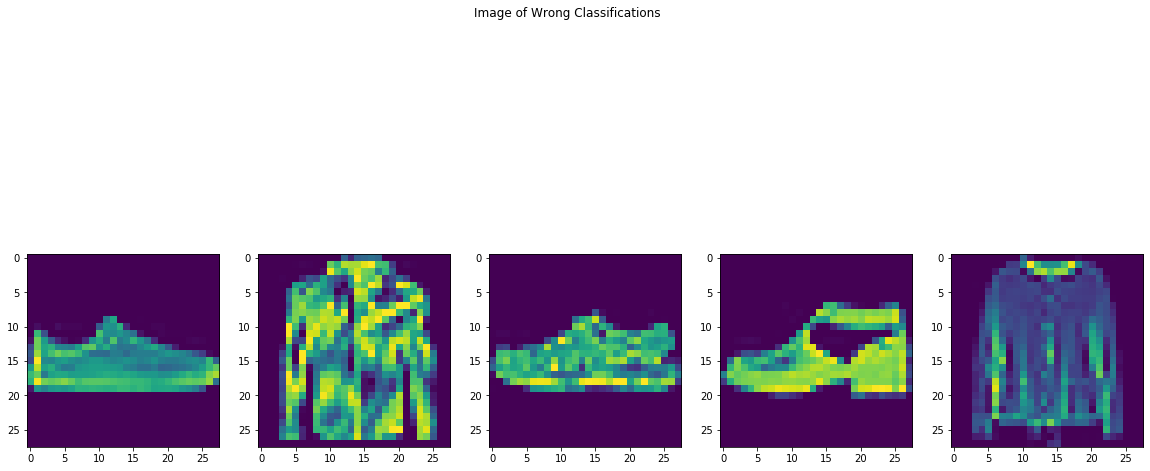

In [37]:
#잘못 예측된 이미지 5개를 뽑아보면 다음과 같다
#5개의 이미지를 한번에 확인하기 위해 subplot함수를 사용하였다
#여기서 나오는 이미지는 original label과 다르게 잘못 예측된 이미지의 original image이다.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20,10))
fig.suptitle('Image of Wrong Classifications')
ax1.imshow(x_test[wrong_predict[0],])
ax2.imshow(x_test[wrong_predict[1],])
ax3.imshow(x_test[wrong_predict[2],])
ax4.imshow(x_test[wrong_predict[3],])
ax5.imshow(x_test[wrong_predict[4],])

###  Repeat the procedure 2~5 using "multinomial logistic regression", and compare the accuracies of "multinomial logistic regression" and "Neural Network."


In [38]:
m_logistic_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation="softmax")
])
#tensorflow 안에 있는 keras라는 라이브러리 안에 있는 models라는 모듈 안에 있는 sequential 함수를 사용한다
#이를 사용하여 간단한 신경망 모델을 만드느넫, 순서대로 연결된 층을 일렬로 쌓아서 구성한다

#flatten: 2차원 배열 (28x28 pixel)의 이미지를 1차원 배열로 변환 - 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림(이 층에서는 학습되는 가중치가 없고 데이터 반환만 이루어짐)
#이 모델은 신경망 모델이 아닌 multinomial logistic reggresion으로  바로 마지막 레이어에서 10개의 노드의 softmax 층 가져 -10개의 확률을 반환한다
# 여기서도 위와 동일하게 각 노드는 주어진 이미지가 10개의 클래스 중 하나에 속할 확률들을 출력함

 2 - Count how may parameters are needed with the model in 1. Check your calculation with "model.summary()" in python. 

In [39]:
# 필요한 parameter를 계산하는 식을 이용하면 다음과 같다.
# parameter number = output channel 수 * (input channel 수 + 1)
print(10*(784+1)) #7,850 개

7850


In [40]:
m_logistic_model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#모델을 훈련하기 전 필요한 몇가지 설정들이 compile단계를 통해 추가된다
#loss : 손실함수 loss function- 훈련 하는 동안 모델의 오차 측정 위한 함수 결정 (모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화 함)
#optimizer : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정 - sgd(stochastic gradient descent)선택
#metrics: training과 test단계에서 지표 선택 - 올바르게 분류된 이미지의 비율인 accuracy 선택
m_logistic_model.summary()
#summmary함수를 통해 parameter 수를 확인해본 결과,
#이 모델은 총 7,850개의 학습 parameter가 요구된다 (앞서 neural net보다 훨씩 적은 파라미터 수를 가진다)
#앞에서 계산한 parameter개수와 동일하다

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


3 -  Train your model, and draw learning curve to see whether the learning is proper or not.

In [41]:
m_logistic_history =  m_logistic_model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), batch_size=128)
#모델 훈련- train data 학습, epoch(신경망에서 전체 데이터 셋에 대해 한 번 학습을 완료한 상태)은 20으로 설정 
#batch size(한번의 batch 마다 주는 데이터 sample의 size) 는 128로 설정 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 44us/sample - loss: 1.2123 - accuracy: 0.6384 - val_loss: 0.8873 - val_accuracy: 0.7182
Epoch 2/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.8151 - accuracy: 0.7404 - val_loss: 0.7517 - val_accuracy: 0.7585
Epoch 3/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.7224 - accuracy: 0.7686 - val_loss: 0.6911 - val_accuracy: 0.7760
Epoch 4/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.6719 - accuracy: 0.7858 - val_loss: 0.6514 - val_accuracy: 0.7892
Epoch 5/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.6384 - accuracy: 0.7963 - val_loss: 0.6262 - val_accuracy: 0.7944
Epoch 6/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.6140 - accuracy: 0.8025 - val_loss: 0.6048 - val_accuracy: 0.8027
Epoch 7/20
50000/50000 [==============================] 

In [42]:
m_result = m_logistic_history.history

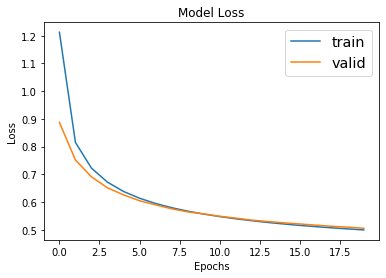

In [43]:
plt.plot(m_result['loss'], label="train")
plt.plot(m_result['val_loss'], label = "valid")
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize='x-large')
plt.show() #잘 학습되었는지 loss를 figure를 통해 확인

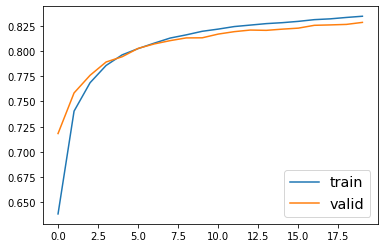

In [44]:
plt.plot(m_result["accuracy"], label="train")
plt.plot(m_result["val_accuracy"], label="valid")
plt.legend(fontsize='x-large')
plt.show()
plt.show() #잘 학습되었는지 accuracy를 figure를 통해 확인

4 -  Using the model in 3, predict the test set. What is the accuracy of your model in the test data ? 

In [45]:
#직접 predict하여 비교하여 accuracy를 구하였다

In [46]:
y_pred_logistic = m_logistic_model.predict(x_test) #앞서 훈련한 모델을 사용하여 test set에 있는 각 이미지의 label 예측
y_pred_logistic[0,:]  # 예측결과 , 10개의 숫자 배열로 나타남 

array([5.3266336e-05, 5.4278444e-05, 3.8225509e-04, 8.2979946e-05,
       7.2061410e-04, 1.6597296e-01, 3.8422487e-04, 2.5697315e-01,
       1.5996596e-02, 5.5937970e-01], dtype=float32)

In [47]:
print(y_pred_logistic.shape)

(10000, 10)


In [48]:
y_pred_logistic_class = np.argmax(y_pred_logistic, axis=1) #다차원 배열에서 차원에 따라 가장 큰 값의 index들을 반환해주는 np.argmax함수를 이용하여 최종적으로 label를 예측한다

In [49]:
y_pred_logistic_class[:5] # 예측된 class들을 살펴보면 다음과 같이  하나의 클래스로 결정된다. 

array([9, 2, 1, 1, 6], dtype=int64)

In [50]:
np.mean(y_test == y_pred_logistic_class)  #올바르게 분류된 이미지의 비율인 accuracy를 계산해보면 0.8228이 나온다
# 앞서 neural net을 사용했을 때 accuracy가 0.8498이었는데 이와 비교해보았을 때, neural net이 더 성능이 좋은 모델이라는 것을 알 수 있다

0.8228

5 - Draw the first 5 figures of wrong predictions. What are predicted classifications by your model and the actual classifications for these figures?

In [51]:
m_predict_result = (y_test == y_pred_logistic_class) #잘못 예측된 이미지를 찾기 위해 먼저 true, false 형태로 잘 예측되었는지 뽑아낸다

In [52]:
m_predict_result[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [53]:
nrange = np.arange(0, 10000) #총 10000개의 test 이미지 중 잘못된 걸 뽑아내기 위해 먼저 범위 지정

In [54]:
m_wrong_predict = nrange[m_predict_result==False] # class 분류 결과 false인것만 뽑아온다

In [55]:
print(y_pred_logistic_class[m_wrong_predict[0:5],], y_test[m_wrong_predict[0:5]])
#앞서 잘못 예측된 이미지는 각각 5 6 0 7 7 class로 예측되었으나
#실제로는 7 4 2 5 9의 class를 가지고 있었어야 했다.

[5 6 0 7 7] [7 4 2 5 9]


In [56]:
#다섯개의 잘못분류된 이미지의 본래 라벨, 예측 라벨을 클래스 이름으로 뽑아보면 다음과 같다
for idx in m_wrong_predict[:5]:
    print('original label of ',idx, 'th index: ', class_names[y_test[idx]])
    print('predicted label: ',idx, 'th index: ',  class_names[y_pred_logistic_class[idx]])
    print('-----------------------------------')

original label of  12 th index:  Sneaker
predicted label:  12 th index:   Sandal
-----------------------------------
original label of  17 th index:  Coat
predicted label:  17 th index:  Shirt
-----------------------------------
original label of  20 th index:  Pullover
predicted label:  20 th index:  T-shirt/top
-----------------------------------
original label of  21 th index:   Sandal
predicted label:  21 th index:  Sneaker
-----------------------------------
original label of  23 th index:  Ankle boot
predicted label:  23 th index:  Sneaker
-----------------------------------


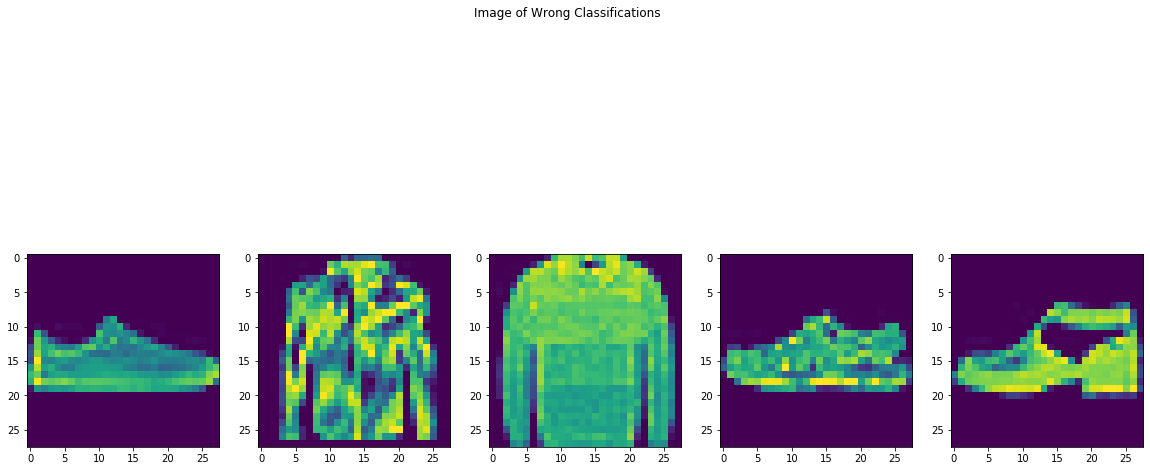

In [57]:
#잘못 예측된 이미지 5개를 뽑아보면 다음과 같다
#5개의 이미지를 한번에 확인하기 위해 subplot함수를 사용하였다
#여기서 나오는 이미지는 original label과 다르게 잘못 예측된 이미지의 original image이다
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20,10))
fig.suptitle('Image of Wrong Classifications')
ax1.imshow(x_test[m_wrong_predict[0],])
ax2.imshow(x_test[m_wrong_predict[1],])
ax3.imshow(x_test[m_wrong_predict[2],])
ax4.imshow(x_test[m_wrong_predict[3],])
ax5.imshow(x_test[m_wrong_predict[4],])